# 파일 불러오기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and di

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
%config InlineBackend.figure_format = 'retina'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 최종전처리완_우주.csv to 최종전처리완_우주.csv


In [4]:
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
!ls

pd.set_option("display.max_columns", 100)

최종전처리완_우주.csv  sample_data


In [5]:
df =pd.read_csv('최종전처리완_우주.csv', encoding='cp949')
df.head()

,Unnamed: 0,left,top,right,bottom,id,경도,위도,SIG_KOR_NM,EMD_NM,id_2,보증금(만원),월세(만원),원래id,구,동,있없_y,경위도,hospital,pharmacy,gym,libraray,police,park,HubDist,subHubDist,busHubDist,교통사고,화재,범죄,생활안전,자살,감염병,CAFE_COUNT,UNIV_COUNT,sub_count,bus_count,Convenience_count,공시지가(원/㎡)
0,0,936035.2302,1950987.158,936535.2302,1950487.158,155,126.778,37.554,강서구,오곡동,141139,2123.293235,36.439218,141139,강서구,오곡동,0,126.778~37.554,5.18358,2.15302,3.67907,1.98084,5.21007,2.09785,5.78119,2.22703,0.84296,2,2,3,2,2,3,0,0,0,0,0,2.395680e+06
1,1,936035.2302,1951487.158,936535.2302,1950987.158,154,126.778,37.558,강서구,오곡동,141140,2123.293235,36.439218,141140,강서구,오곡동,0,126.778~37.558,5.83139,2.31283,3.43487,2.47947,5.90689,2.25466,5.83982,2.06801,0.82944,2,2,3,2,2,3,0,0,0,0,0,2.395680e+06
2,2,936535.2302,1950487.158,937035.2302,1949987.158,217,126.784,37.549,강서구,오곡동,141325,2123.293235,36.439218,141325,강서구,오곡동,0,126.784~37.549,4.33014,2.80493,3.16774,1.39614,3.89637,2.57305,5.26538,2.09050,1.51051,2,2,3,2,2,3,0,0,0,0,0,2.395680e+06
3,3,937035.2302,1949987.158,937535.2302,1949487.158,279,126.790,37.545,강서구,오쇠동,141515,2123.293235,36.439218,141515,강서구,오쇠동,0,126.79~37.545,4.18372,2.66151,3.20518,1.25273,3.75296,2.42963,4.79865,2.18665,1.01933,2,2,3,2,2,3,0,0,0,0,0,2.395680e+06
4,4,937535.2302,1949487.158,938035.2302,1948987.158,341,126.795,37.540,강서구,오쇠동,141709,2123.293235,36.439218,141709,강서구,오쇠동,0,126.795~37.54,3.69270,2.17661,2.52142,2.19558,3.17743,2.13587,4.39665,2.48865,0.31440,2,2,3,2,2,3,0,0,0,2,0,2.395680e+06


In [6]:
df.columns

Index(['Unnamed: 0', 'left', 'top', 'right', 'bottom', 'id', '경도', '위도',
       'SIG_KOR_NM', 'EMD_NM', 'id_2', '보증금(만원)', '월세(만원)', '원래id', '구', '동',
       '있없_y', '경위도', 'hospital', 'pharmacy', 'gym', 'libraray', 'police',
       'park', 'HubDist', 'subHubDist', 'busHubDist', '교통사고', '화재', '범죄',
       '생활안전', '자살', '감염병', 'CAFE_COUNT', 'UNIV_COUNT', 'sub_count',
       'bus_count', 'Convenience_count', '공시지가(원/㎡)'],
      dtype='object')

In [7]:
drop_columns = ['Unnamed: 0', '보증금(만원)', '월세(만원)', '경도', '위도', 'SIG_KOR_NM', 'EMD_NM', 'id_2', 'left', 'top', 'right', 'bottom','id','원래id','구','동','경위도']
df = df.drop(drop_columns, axis=1)

In [8]:
df = df.rename(columns={'있없_y':'있없'})

# 정규화

In [9]:
from sklearn.preprocessing import MinMaxScaler

minmax = ['hospital','pharmacy','gym',
          'libraray','police','park','HubDist','subHubDist','subHubDist','교통사고','화재','범죄','생활안전','자살','감염병','CAFE_COUNT', 'UNIV_COUNT', 'sub_count',
       'bus_count', 'Convenience_count', '공시지가(원/㎡)']
scaler = MinMaxScaler()
df[minmax] = scaler.fit_transform(df[minmax])
df.head()

,있없,hospital,pharmacy,gym,libraray,police,park,HubDist,subHubDist,busHubDist,교통사고,화재,범죄,생활안전,자살,감염병,CAFE_COUNT,UNIV_COUNT,sub_count,bus_count,Convenience_count,공시지가(원/㎡)
0,0,0.182693,0.075435,0.131822,0.071788,0.193120,0.072852,0.750756,0.633178,0.84296,0.333333,0.25,0.333333,0.25,0.333333,0.5,0.0,0.0,0.0,0.000000,0.0,0.037036
1,0,0.205768,0.081095,0.122917,0.090152,0.219106,0.078355,0.758449,0.587654,0.82944,0.333333,0.25,0.333333,0.25,0.333333,0.5,0.0,0.0,0.0,0.000000,0.0,0.037036
2,0,0.152292,0.098523,0.113176,0.050254,0.144129,0.089529,0.683081,0.594092,1.51051,0.333333,0.25,0.333333,0.25,0.333333,0.5,0.0,0.0,0.0,0.000000,0.0,0.037036
3,0,0.147077,0.093444,0.114541,0.044972,0.138781,0.084496,0.621845,0.621618,1.01933,0.333333,0.25,0.333333,0.25,0.333333,0.5,0.0,0.0,0.0,0.000000,0.0,0.037036
4,0,0.129586,0.076271,0.089606,0.079696,0.117318,0.074186,0.569102,0.708075,0.31440,0.333333,0.25,0.333333,0.25,0.333333,0.5,0.0,0.0,0.0,0.074074,0.0,0.037036


In [10]:
y_df = df[['있없']]
x_df = df.drop(['있없'], axis=1)

# 훈련/검증 데이터 분리

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.3,stratify=y_df)

In [12]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1408, 21) (604, 21) (1408, 1) (604, 1)


# PCA: x_train

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

In [14]:
pd.DataFrame(x_train_pca)

,0,1
0,-0.405042,-0.359518
1,0.411678,0.566698
2,-0.222359,-0.113689
3,-0.438176,-0.314068
4,-0.205340,0.632895
...,...,...
1403,-0.011299,-0.473301
1404,0.387532,0.592295
1405,-0.365755,0.106886
1406,0.070538,-0.093112


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


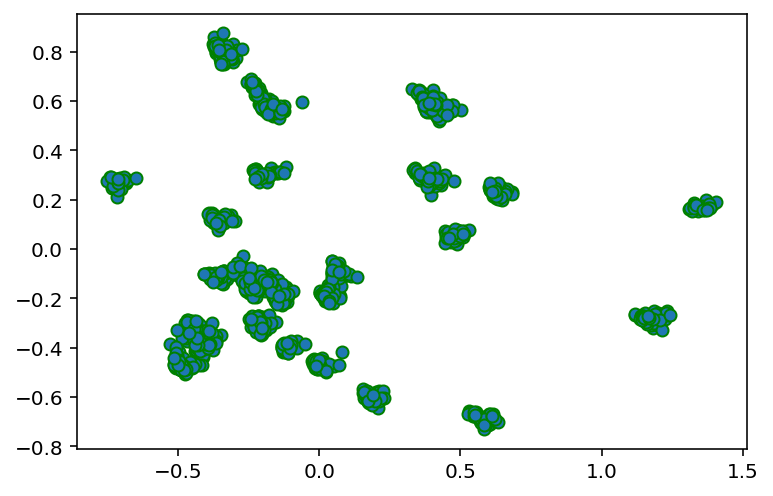

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x_train_pca[:,0], x_train_pca[:,1], linewidths=1, edgecolors='green')
plt.show()

In [16]:
y_train

,있없
573,0
1313,0
596,0
581,0
1468,0
...,...
607,0
1523,0
1275,1
314,0


# 데이터 수 증식(SMOTE)

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)
x_train_smote, y_train_smote   = smote.fit_resample(x_train, y_train)
x_train_smote = pd.DataFrame(x_train_smote, columns=x_train.columns)

In [18]:
print('원본데이터 클래스',format(pd.get_dummies(y_train).sum()))

원본데이터 클래스 있없    62
dtype: int64


In [19]:
print('오버샘플링 클래스',format(pd.get_dummies(y_train_smote).sum()))

오버샘플링 클래스 0    1346
1    1346
dtype: int64


## PCA: x_train_smote

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train_smote)
x_train_smote_pca = pca.transform(x_train_smote)

In [21]:
pd.DataFrame(x_train_smote_pca)

,0,1
0,-0.384311,-0.408934
1,0.282257,0.550038
2,-0.260445,-0.132896
3,-0.399994,-0.384163
4,-0.287000,0.623383
...,...,...
2687,0.357397,0.314055
2688,-0.262424,-0.172802
2689,1.183459,-0.199730
2690,-0.168779,-0.364907


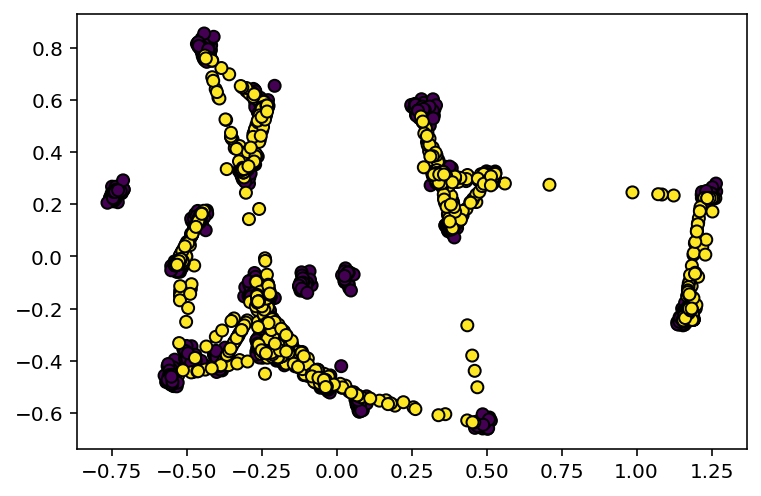

In [22]:
plt.scatter(x_train_smote_pca[:,0], x_train_smote_pca[:,1], c=y_train_smote, linewidths=1, edgecolors='black')
plt.show()

In [23]:
x_train = x_train_smote #이부분 조정
y_train = y_train_smote

# 머신러닝/딥러닝 실행

##DNN

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
                    Dense(128, activation='relu', input_dim=x_train.shape[1]),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(16, activation='relu'),                    
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [25]:
checkpoint_path = 'tmp_model.ckpt'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_loss',verbose=1)

In [26]:
with tf.device('/device:GPU:0'):
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
  history = model.fit(x_train, y_train, epochs=20, batch_size=1, callbacks=[checkpoint])

Epoch 1/20
2692/2692 [==============================] - 5s 2ms/step - loss: 0.4877 - acc: 0.7500
Epoch 2/20
2692/2692 [==============================] - 5s 2ms/step - loss: 0.3520 - acc: 0.8462
Epoch 3/20
2692/2692 [==============================] - 5s 2ms/step - loss: 0.2977 - acc: 0.8752
Epoch 4/20
2692/2692 [==============================] - 5s 2ms/step - loss: 0.2561 - acc: 0.9023
Epoch 5/20
2692/2692 [==============================] - 5s 2ms/step - loss: 0.2234 - acc: 0.9153
Epoch 6/20
2692/2692 [==============================] - 5s 2ms/step - loss: 0.2040 - acc: 0.9235
Epoch 7/20
2692/2692 [==============================] - 5s 2ms/step - loss: 0.1926 - acc: 0.9272
Epoch 8/20
2692/2692 [==============================] - 5s 2ms/step - loss: 0.1672 - acc: 0.9383
Epoch 9/20
2692/2692 [==============================] - 5s 2ms/step - loss: 0.1682 - acc: 0.9335
Epoch 10/20
2692/2692 [==============================] - 5s 2ms/step - loss: 0.1605 - acc: 0.9435
Epoch 11/20
2692/2692 [======

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\n테스트 정확도:', test_acc)

19/19 - 0s - loss: 0.5806 - acc: 0.8808

테스트 정확도: 0.8807947039604187


In [28]:
predictions = model.predict(x_df)

In [29]:
preds = [ 1 if x>0.5 else 0 for x in predictions]

In [31]:
x_df['preds_dnn'] = preds
x_df

,hospital,pharmacy,gym,libraray,police,park,HubDist,subHubDist,busHubDist,교통사고,화재,범죄,생활안전,자살,감염병,CAFE_COUNT,UNIV_COUNT,sub_count,bus_count,Convenience_count,공시지가(원/㎡),preds_dnn
0,0.182693,0.075435,0.131822,0.071788,0.193120,0.072852,0.750756,0.633178,0.84296,0.333333,0.25,0.333333,0.25,0.333333,0.5,0.00000,0.0,0.0,0.000000,0.000000,0.037036,0
1,0.205768,0.081095,0.122917,0.090152,0.219106,0.078355,0.758449,0.587654,0.82944,0.333333,0.25,0.333333,0.25,0.333333,0.5,0.00000,0.0,0.0,0.000000,0.000000,0.037036,0
2,0.152292,0.098523,0.113176,0.050254,0.144129,0.089529,0.683081,0.594092,1.51051,0.333333,0.25,0.333333,0.25,0.333333,0.5,0.00000,0.0,0.0,0.000000,0.000000,0.037036,0
3,0.147077,0.093444,0.114541,0.044972,0.138781,0.084496,0.621845,0.621618,1.01933,0.333333,0.25,0.333333,0.25,0.333333,0.5,0.00000,0.0,0.0,0.000000,0.000000,0.037036,0
4,0.129586,0.076271,0.089606,0.079696,0.117318,0.074186,0.569102,0.708075,0.31440,0.333333,0.25,0.333333,0.25,0.333333,0.5,0.00000,0.0,0.0,0.074074,0.000000,0.037036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,0.097709,0.010439,0.036714,0.013177,0.014856,0.015669,0.804537,0.319923,0.04810,0.666667,0.50,0.333333,0.00,0.666667,0.5,0.01005,0.0,0.0,0.481481,0.130435,0.180784,0
2008,0.109768,0.027691,0.014744,0.012480,0.030016,0.003049,0.857089,0.440393,0.10684,0.666667,0.50,0.333333,0.00,0.666667,0.5,0.00000,0.0,0.0,0.333333,0.043478,0.180784,0
2009,0.278042,0.410028,0.466784,0.371618,0.384262,0.351136,0.673123,0.468566,0.57503,0.666667,0.50,0.333333,0.00,0.666667,0.5,0.00000,0.0,0.0,0.000000,0.000000,0.180784,0
2010,0.056884,0.029110,0.061228,0.020571,0.071462,0.021256,0.753540,0.344766,0.43388,0.666667,0.50,0.333333,0.00,0.666667,0.5,0.00000,0.0,0.0,0.000000,0.000000,0.180784,0


##XGBoost

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
x_df = x_df.drop(['preds_dnn'], axis=1)
predictions_xgb = xgb.predict(x_df)

In [34]:
predictions_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
preds_xgb = [ 1 if x>0.5 else 0 for x in predictions_xgb]
print(preds_xgb)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


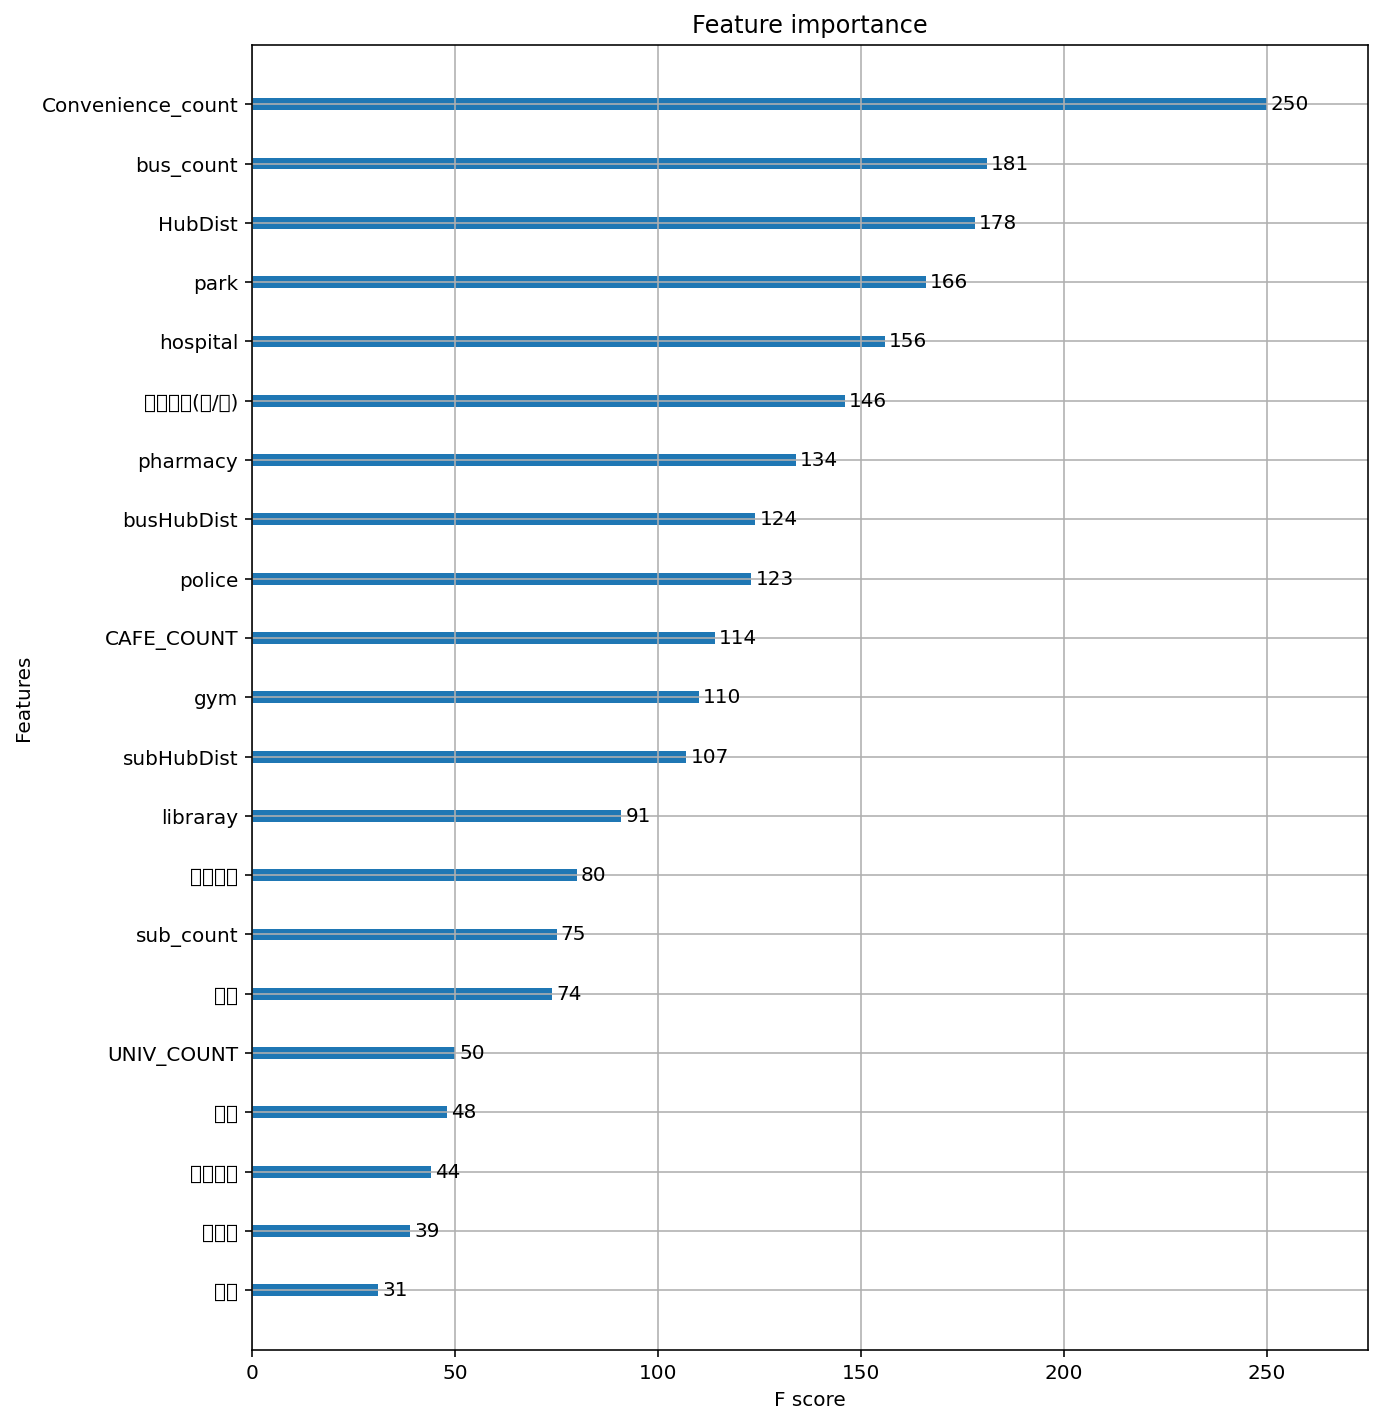

In [36]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

##RF

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, max_depth=3)
rf.fit(x_train, y_train)

predictions_rf = rf.predict(x_df)
preds_rf = [ 1 if x>0.5 else 0 for x in predictions_rf]

###특성 중요도

특성 중요도 : 
[0.0348937  0.01968185 0.00622304 0.0071756  0.01062684 0.01006512
 0.1896723  0.05053273 0.01851269 0.0099194  0.07080103 0.00830003
 0.00497843 0.01558522 0.02731388 0.11255493 0.00072259 0.00760568
 0.04100176 0.18953172 0.16430146]
특성 중요도 : 
[0.00072259 0.00497843 0.00622304 0.0071756  0.00760568 0.00830003
 0.0099194  0.01006512 0.01062684 0.01558522 0.01851269 0.01968185
 0.02731388 0.0348937  0.04100176 0.05053273 0.07080103 0.11255493
 0.16430146 0.18953172 0.1896723 ]


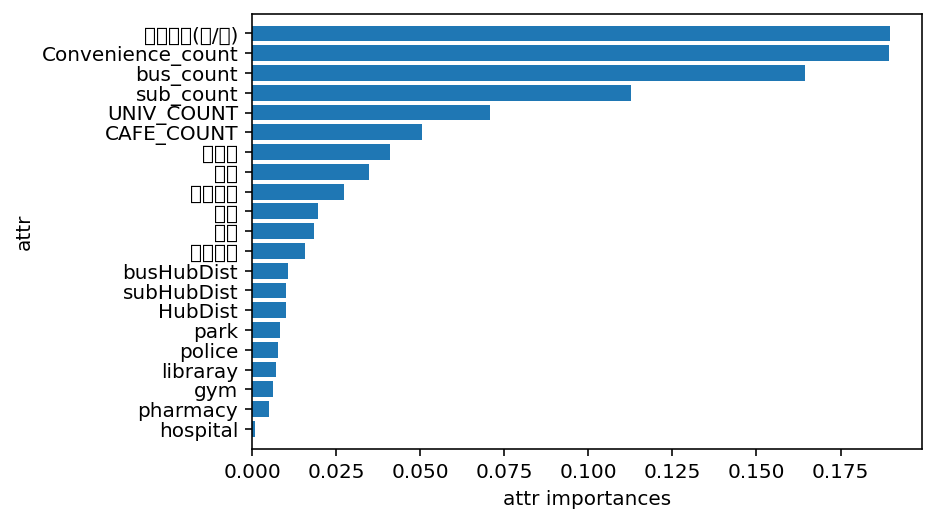

In [38]:
# 특성 중요도
print("특성 중요도 : \n{}".format(rf.feature_importances_))
x=rf.feature_importances_
y=x.sort()

print("특성 중요도 : \n{}".format(x))

# 특성 중요도 시각화 하기
def plot_feature_importances(model):
    n_features = x_df.shape[1]
    plt.barh(range(n_features), x, align='center')
    plt.yticks(np.arange(n_features),x_df)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plt.show()
plot_feature_importances(rf)


##LGB

In [39]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=400, max_depth=3,learning_rate=0.1)
lgb.fit(x_train, y_train)

predictions_lgb = lgb.predict(x_df)
preds_lgb = [ 1 if x>0.5 else 0 for x in predictions_lgb]

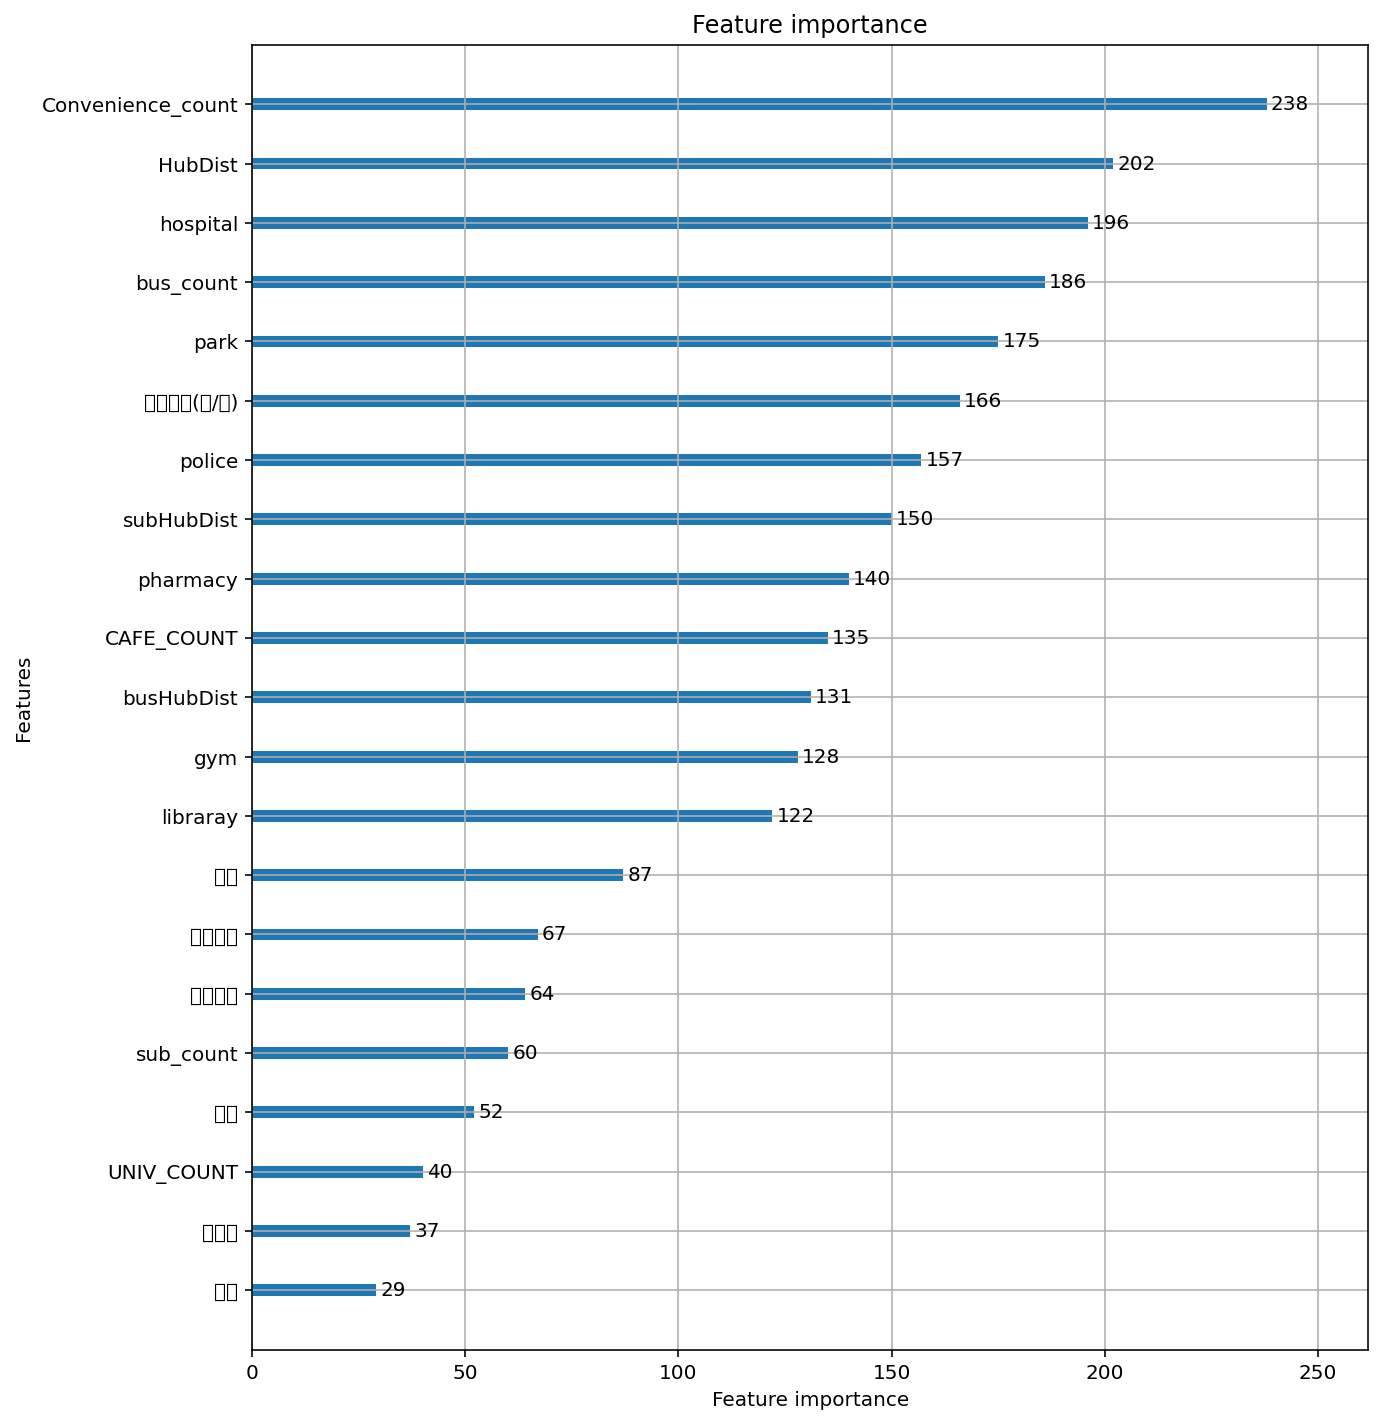

In [40]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb, ax=ax)

In [41]:
x_df['preds_dnn'] = preds
x_df['preds_xgb'] = preds_xgb
x_df['preds_rf'] = preds_rf
x_df['preds_lgb'] = preds_lgb

In [42]:
x_df.to_csv('0.3원본+머신러닝딥러닝결과.csv', index=False, encoding='cp949')